<a href="https://colab.research.google.com/github/PabloCavanzo/MetodosI_AntonioMorillo_PabloCavanzo/blob/main/Parcial%203/9.7_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# A)
df = pd.read_csv('https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv')
name = 'HiggsFitting.csv'
df.to_csv(name, index=False)
print('Archivo descargado y guardado como {}'.format(name))

Archivo descargado y guardado como HiggsFitting.csv


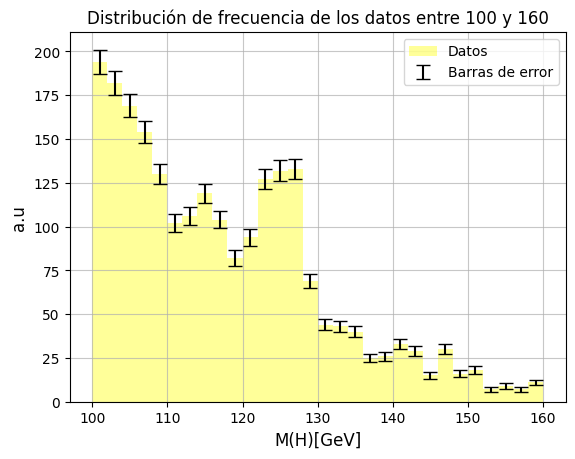

In [3]:
# B)
HSignalBkg, bin_ed = np.histogram(df, bins=30, range=(100, 160))
m = (bin_ed[:-1] + bin_ed[1:])/2

plt.hist(df, bins=30, range=(100,160), label='Datos',color='yellow', alpha=0.4)
plt.errorbar(m,HSignalBkg, yerr=0.5*np.sqrt(HSignalBkg), fmt= 'none', ecolor='k',label='Barras de error' , capsize=5)
plt.grid(alpha=0.7)
plt.title('Distribución de frecuencia de los datos entre 100 y 160')
plt.xlabel('M(H)[GeV]', fontsize=12)
plt.ylabel('a.u', fontsize=12)
plt.legend(fontsize=10)
plt.show()

In [4]:
# C)
def Likelihood(α, x):
  return (1/α) * np.exp(-(x - 100)/α)

In [5]:
# D)
def negLog_Likelihood(α, x):
  if α <= 0:
    return np.inf
  return -np.sum(np.log(Likelihood(α, x)))

In [6]:
# E)
datos = df[(df >= 100) & (df <= 160)]
R = opt.minimize(negLog_Likelihood, 20, args=(datos), bounds = ((0,50),))
Best_α = R.x[0]

print(f'El mejor valor α es: Best_α = {Best_α:.4f}')

El mejor valor α es: Best_α = 17.62


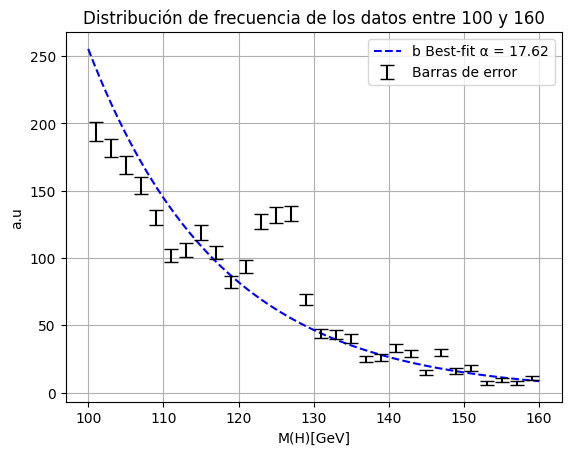

In [7]:
# F)
x = np.linspace(100, 160, 1000)
y = Likelihood(Best_α, x) * len(datos) *(160 - 100)/30

plt.plot(x, y, label=f'b Best-fit α = {Best_α:.2f}', color = 'b', linestyle = '--')
plt.errorbar(m,HSignalBkg, yerr=0.5*np.sqrt(HSignalBkg), fmt= 'none', ecolor='k',label='Barras de error' , capsize=5)
plt.grid()
plt.title('Distribución de frecuencia de los datos entre 100 y 160')
plt.xlabel('M(H)[GeV]')
plt.ylabel('a.u')
plt.legend()
plt.show()

In [8]:
# G)
def Likelihood_Higgs(A, mu, sigma, α, x):
  if np.any(x < 100) or np.any(x > 160):
    return np.inf
  p1 = (A/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-((x-mu)**2)/(2*sigma**2))
  p2 = ((1 - A)/α) * np.exp(-(x - 100)/α)
  return p1 + p2

In [9]:
# H)
def negLog_Likelihood_Higgs(params, x):
  A, mu, sigma, α = params
  if A < 0 or sigma <= 0 or α <= 0 or A > 1:
    return np.inf
  return -np.sum(np.log(Likelihood_Higgs(A, mu, sigma, α, x)))

In [19]:
# I)
datos = df[(df['Higgs'] >= 100) & (df['Higgs'] <= 160)].to_numpy()
p0 = np.array([0.5, 300, 20, 20])
r = opt.differential_evolution(negLog_Likelihood_Higgs, bounds = ( (0,1),(50,500),(1,100), (1,100)), args=(datos,))
Best_A, Best_mu, Best_sigma, Best_alpha = r.x
print(f'El mejor valor A es: Best_A = {Best_A:.4f}')
print(f'El mejor valor μ es: Best_μ = {Best_mu:.4f}')
print(f'El mejor valor σ es: Best_σ = {Best_sigma:.4f}')
print(f'El mejor valor α es: Best_α = {Best_alpha:.4f}')

El mejor valor A es: Best_A = 0.14
El mejor valor μ es: Best_μ = 125.20
El mejor valor σ es: Best_σ = 2.78
El mejor valor α es: Best_α = 16.36


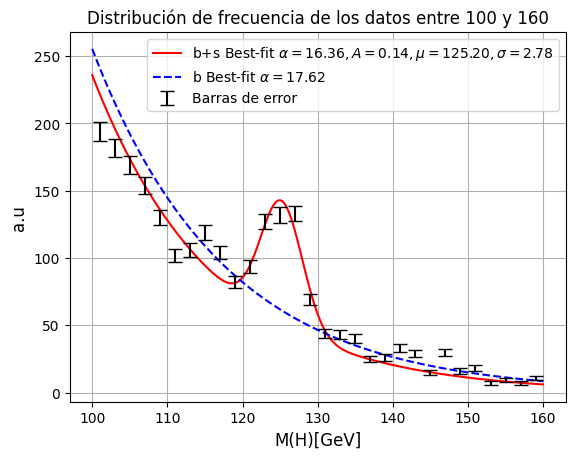

In [20]:
# J)
X = np.linspace(100, 160, 1000)
Y = Likelihood_Higgs(Best_A, Best_mu, Best_sigma, Best_alpha, X)
Y *= len(datos) * (160 - 100) / 30

plt.plot(X, Y, label=f'b+s Best-fit $α = {Best_alpha:.2f}, A = {Best_A:.2f}, μ = {Best_mu:.2f}, σ = {Best_sigma:.2f}$', color = 'r')
plt.plot(x, y, label=f'b Best-fit $α = {Best_α:.2f}$', color = 'b', linestyle = '--')
plt.errorbar(m,HSignalBkg, yerr=0.5*np.sqrt(HSignalBkg), fmt= 'none', ecolor='k',label='Barras de error' , capsize=5)
plt.grid()
plt.title('Distribución de frecuencia de los datos entre 100 y 160')
plt.xlabel('M(H)[GeV]', fontsize=12)
plt.ylabel('a.u',fontsize=12)
plt.legend()
plt.show()

In [21]:
# K)
print('El valor de las constantes físicas A, μ, σ y α son:')
print(f'A = {Best_A:.4f}')
print(f'μ = {Best_mu:.4f}')
print(f'σ = {Best_sigma:.4f}')
print(f'α = {Best_alpha:.4f}')

El valor de las constantes físicas A, μ, σ y α son:
A = 0.14
μ = 125.20
σ = 2.78
α = 16.36


In [22]:
# L)
Params_rx = Best_A, Best_mu, Best_sigma, Best_alpha
nσ = np.sqrt(-2*((negLog_Likelihood_Higgs(Params_rx, datos)) - (negLog_Likelihood(Best_α, datos))))
print(f'El valor de nσ es: nσ = {nσ:.4f}')
if nσ > 5:
  print('nσ > 5, por lo tanto, se puede proclamar un descubrimiento')
else:
  print('nσ < 5, por lo tanto, no se puede proclamar un descubrimiento')

El valor de nσ es: nσ = 15.21
nσ > 5, por lo tanto, se puede proclamar un descubrimiento


In [23]:
# M) Constante de tiempo con ℏ = 1.054571817e-34 (valor verdadero)
def τ(sigma, h_barra=1.054571817e-34):
  sigma_joules = sigma * 1.60218e-10
  return h_barra/sigma_joules

print(f'El tiempo de vida de la partícula es: {τ(Best_sigma)} s')

El tiempo de vida de la partícula es: 2.371619517996852e-25 s


In [15]:
!pip install emcee
!pip install corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.4 MB/s eta 0:00:00


In [24]:
# N)
import emcee
import corner

def LogPrior(p):
  A, mu, sigma, alpha = p
  if 0. < A < 1. and 100. <= mu <= 300. and 0.1 <= sigma <= 20. and 1 <= alpha <= 50:
    return 0.
  else:
    return -np.inf

def LogPosterior(p, x):
  lp = LogPrior(p)
  if not np.isfinite(lp):
    return -np.inf
  return lp - negLog_Likelihood_Higgs(p, x)

N_dim = 4
N_walkers = 10
steps = 8000

p0 = np.array([Best_A, Best_mu, Best_sigma, Best_alpha])
pos = [p0 + 1e-4 * np.random.randn(N_dim) for i in range(N_walkers)]

sampler = emcee.EnsembleSampler(N_walkers, N_dim, LogPosterior, args=(datos,))
sampler.run_mcmc(pos, steps, progress=True)

samples = sampler.get_chain(discard=100, thin=15, flat=True)
percentiles = np.percentile(samples, [2.5, 97.5], axis=0)
medians = percentiles[1]
errors = np.diff(percentiles, axis=0)
print('\n')
print('Parámetro | Media          | Error')
print('_________________________________________')
print('A         | {}   | {}'.format(round(medians[0],10), round(errors[0][0],10)))
print('μ         | {} | {}'.format(round(medians[1],10), round(errors[0][1],10)))
print('σ         | {}   | {}'.format(round(medians[2],10), round(errors[0][2],10)))
print('α         | {}  | {}'.format(round(medians[3],10), round(errors[0][3],10)))

100%|██████████| 8000/8000 [00:28<00:00, 279.61it/s]



Parámetro | Media          | Error
_________________________________________
A         | 0.1786924223   | 0.0601865428
μ         | 125.7117767851 | 1.1663448598
σ         | 3.9629773894   | 1.6648645458
α         | 17.1048439605  | 1.5450796933


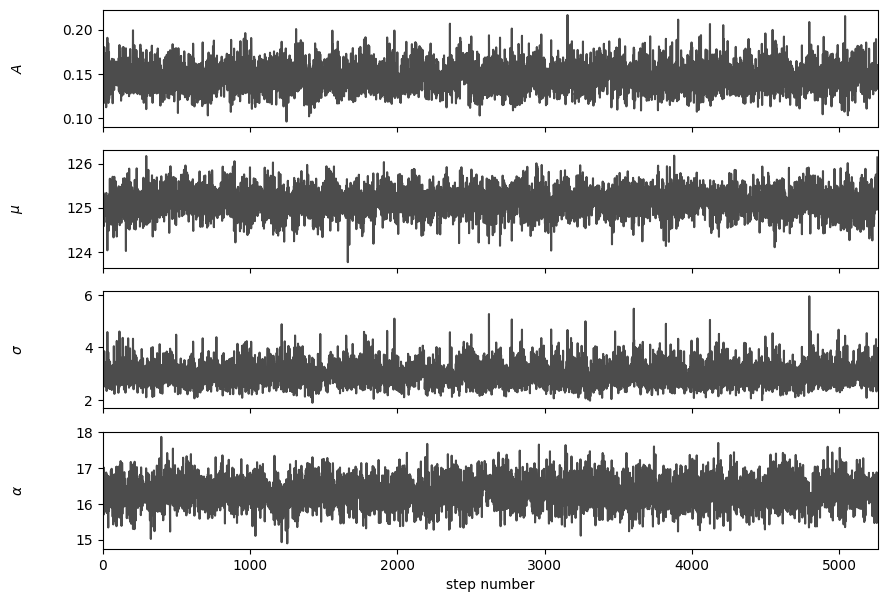

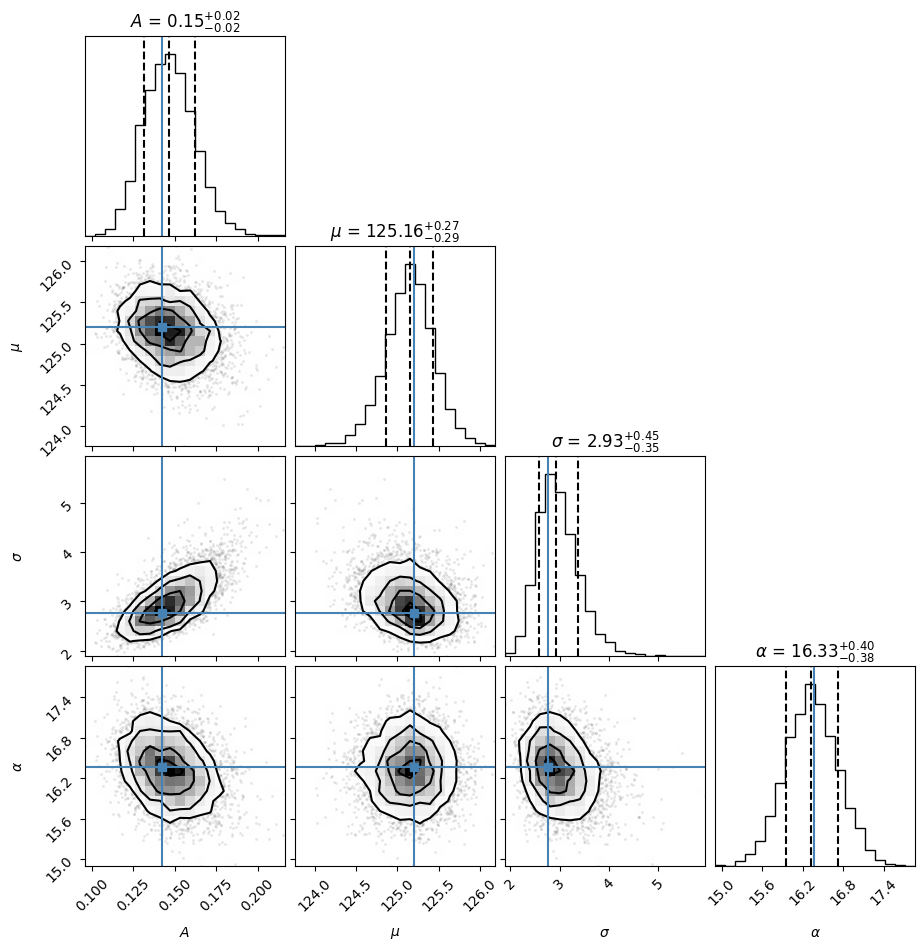

In [25]:
# O)
fig, axes = plt.subplots(N_dim, figsize=(10, 7), sharex=True)
labels = [r'$A$', r'$\mu$', r'$\sigma$', r'$\alpha$']
for i in range(N_dim):
  ax = axes[i]
  ax.plot(samples[:, i], "k", alpha=0.7)
  ax.set_ylabel(labels[i])
  ax.yaxis.set_label_coords(-0.1, 0.5)
plt.xlim(0, len(samples))
axes[-1].set_xlabel("step number")
plt.show()
figure = corner.corner(samples, labels=[r'$A$', r'$\mu$', r'$\sigma$', r'$\alpha$'], truths=[Best_A, Best_mu, Best_sigma, Best_alpha], quantiles=[0.16, 0.5, 0.84], show_titles=True)
plt.show()

In [33]:
# P)
sigma_emcee = errors[0][1]
error = (sigma_emcee/Best_mu) * 100
print(f'La estimación de la masa de esta partícula es: {Best_mu:.4f}')
print(f'El error porcentual es: {error:.4f}%')

La estimación de la masa de esta partícula es: 125.1983
El error porcentual es: 0.9316%
